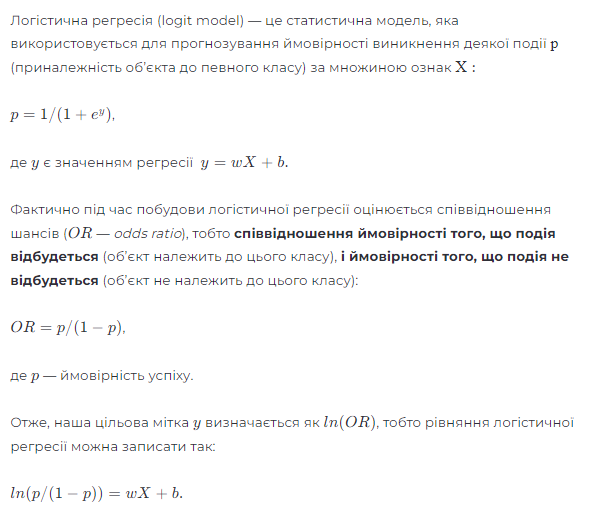

Задача 1.
Провести попередній аналіз даних. Побудувати логістичну регресію для датасета гриби

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# from google.colab import files
import pandas as pd

# Завантаження файлу
# uploaded = files.upload()

In [3]:
df = pd.read_csv('../data/mushroom.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


Цей набір даних є очищеною версією оригінального набору даних Mushroom для бінарної класифікації, доступного в бібліотеці UCI. Цей набір даних було очищено з використанням різних методів, таких як модальне імпутування, кодування з одним кроком, нормалізація z-показника та вибір ознак. Він містить 9 колонок:

Діаметр кришки
Форма шапки
Прикріплення зябер
Колір зябер
Висота стебла
Ширина стебла
Колір стебла
Сезон
Цільовий клас - це їстівне чи ні?
Цільовий клас містить два значення – 0 або 1, де 0 означає їстівне, а 1 – отруйне.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
df.duplicated().sum()

np.int64(303)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.size

483588

In [8]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [9]:
# Визначення цільової змінної та ознак
TARGET = 'class'
FEATURES = [col for col in df.columns if col != TARGET]

# Визначення категоріальних та числових ознак
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 5
Categorical features: ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season'] 

Number of continuous features: 3
Continuous features: ['cap-diameter', 'stem-height', 'stem-width'] 



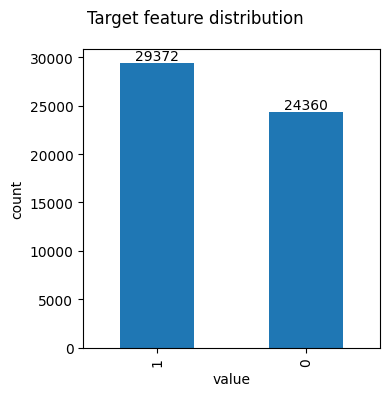

In [10]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(4, 4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

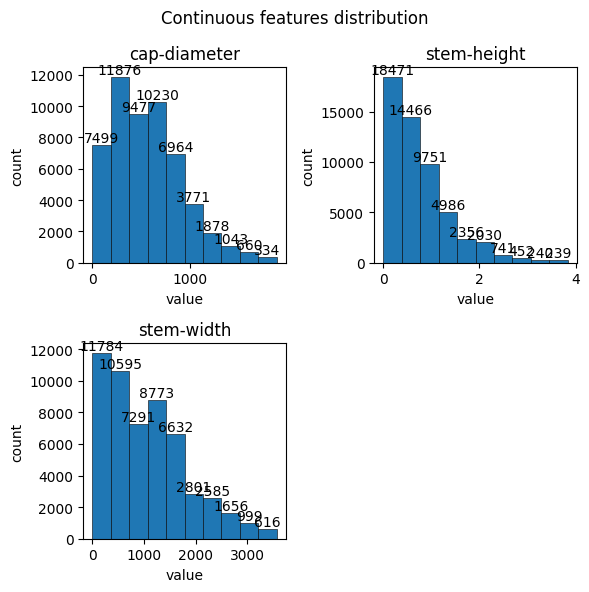

In [11]:
ax = df.loc[:, cont_features].hist(figsize=(6, 6), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")

plt.tight_layout()
plt.show()

In [12]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,2.142857,7.344599,0.752102,1057.000633,8.454013,0.952322,0.546639
std,360.384461,2.165188,2.232546,3.190447,0.645987,780.263033,3.235507,0.303795,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270146,430.000000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,8.000000,0.589316,929.000000,11.000000,0.943195,1.000000
75%,782.000000,6.000000,4.000000,10.000000,1.046900,1527.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [13]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [14]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [15]:
# Розрахунок кореляції
correlation_matrix = df.corr()

# Виведення кореляцій з цільовою змінною 'class'
correlation_with_class = correlation_matrix['class']
print(correlation_with_class)

cap-diameter      -0.162830
cap-shape         -0.131385
gill-attachment   -0.052397
gill-color        -0.060166
stem-height        0.175839
stem-width        -0.177310
stem-color        -0.119940
season            -0.083363
class              1.000000
Name: class, dtype: float64


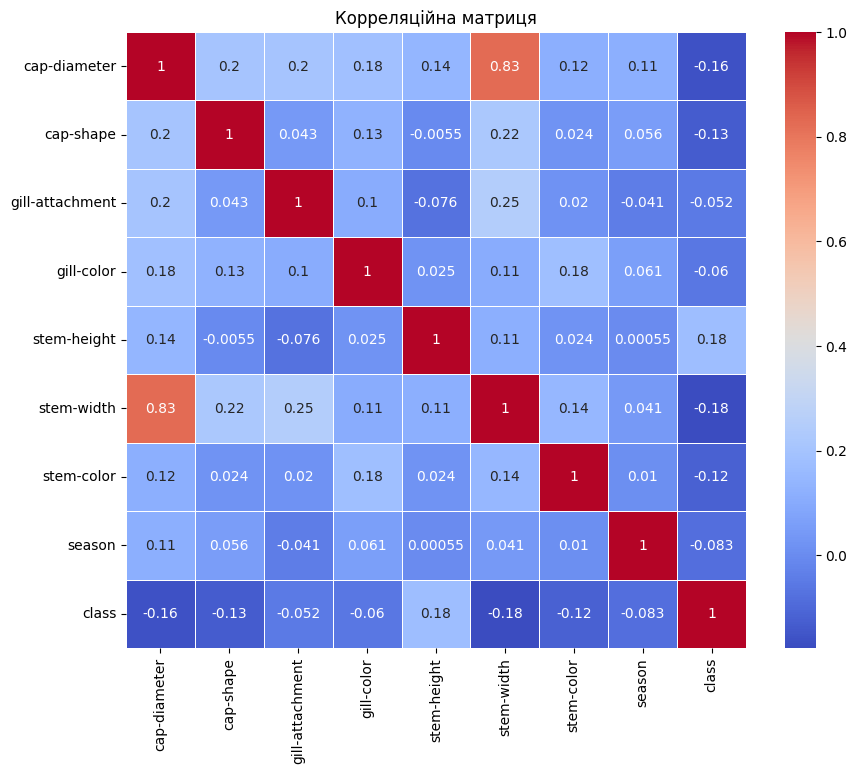

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

**Логістична регресія**

In [17]:
df.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


У функції train_test_split встановимо значення аргументу stratify = y. Цей аргумент забезпечує збереження розподілу цільової змінної в наборах даних train/tets.

In [18]:
# Поділимо дані на тренувальну і тестову вибірки
TARGET = 'class'
X = df.drop(TARGET , axis =1 )
y = df[TARGET]

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify=y)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Дані перетворення потрібні для правильного формату вхідних даних у нейронних мережах та інших алгоритмах машинного навчання. Транспонування (.T) змінює розташування даних, а np.expand_dims додає додатковий вимір, що може бути необхідним для сумісності з певними бібліотеками (наприклад, TensorFlow або PyTorch).

Навіщо потрібне транспонування? Деякі алгоритми глибокого навчання, зокрема нейромережі, працюють ефективніше, коли кожна ознака є окремим рядком, а зразки розташовані у стовпцях.

In [20]:
#Для подальших коректних обрахунків транспонуємо матрицю вхідних ознак і вектор цільової змінної.
x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T, 0)

print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)

X train size (8, 36000)
X test size (8, 17732)
y train size (1, 36000)
y test size (1, 17732)


Нам потрібно задати початкові параметри ваг w, які будуть змінюватись під час навчання. Нехай усі значення ваг w будуть дорівнювати 0.01, а значення зміщення
b буде дорівнювати нулю.

In [21]:
#Ініціалізація параметрів моделі
def initialize_weights_and_bias(dimension):
    # dimension - number of input features
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [22]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [23]:
# In backward propagation we will use y_head that found in forward propagation
# Therefore instead of writing the backward propagation method, let's combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [24]:
def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)  # Бінарне перетворення ймовірностей у класи
    accuracy = np.mean(predictions == y_train)  # Середня точність
    return accuracy

In [25]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)

        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list, label='Cost')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title('Графік функції втрат')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(index, accuracy_list, label='Accuracy', color='orange')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.title('Графік точності')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return parameters, gradients, cost_list, accuracy_list

In [26]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [27]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # Ініціалізація
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Оновлення параметрів і отримання всіх значень
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Прогнозування
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Розрахунок точності
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    # Виведення точності
    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

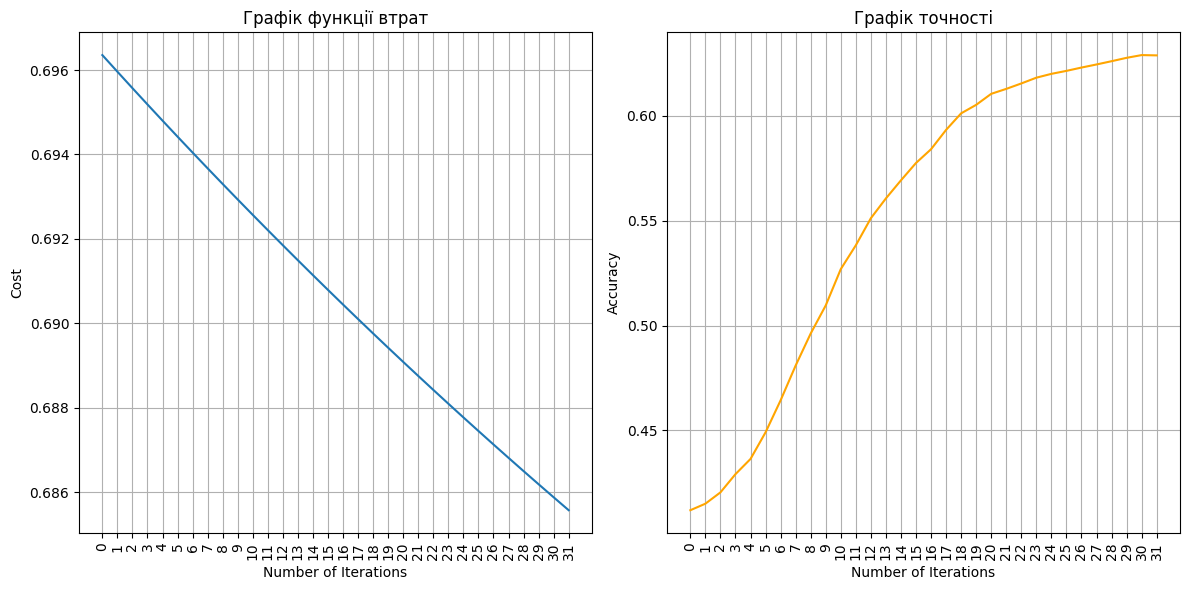

Train accuracy: 62.94 %
Test accuracy: 62.72 %


In [28]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 32)

Реалізація логістичної регресії sk learn

In [29]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
X = df.drop('class', axis=1)
y = df['class']

# Розділяємо на навчальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
log_reg = LogisticRegression()

# Визначаємо сітку параметрів для пошуку
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [34]:
# Прогнозуємо, використовуючи найкращу модель
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [35]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56      4783
           1       0.65      0.70      0.67      5964

    accuracy                           0.62     10747
   macro avg       0.62      0.62      0.62     10747
weighted avg       0.62      0.62      0.62     10747



In [36]:
# Отримуємо DataFrame з тестовими даними, справжніми та прогнозованими результатами
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Вибираємо 10 випадкових прикладів
random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]
random_results

,True Label,Predicted Label
42338,1,1
47550,1,0
19366,0,1
14185,0,0
29915,0,0
12524,1,1
817,0,1
31917,1,1
52989,1,1
5692,0,0


In [37]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [38]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      4783
           1       0.69      0.61      0.65      5964

    accuracy                           0.63     10747
   macro avg       0.63      0.63      0.63     10747
weighted avg       0.64      0.63      0.63     10747



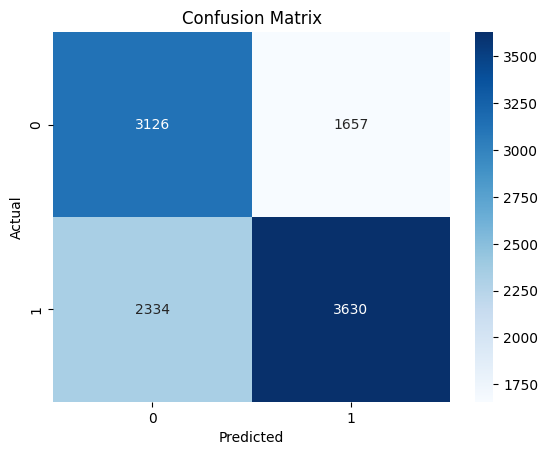

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Завдання 4 (дз). Провести аналіз даних. Побудувати лог. регресію. Зробити висновки

In [40]:
stop
import pandas as pd


NameError: name 'stop' is not defined

In [ ]:
df = pd.read_csv('Student_data.csv')
df


**StudentID** : унікальний ідентифікатор, призначений кожному студенту (від 1001 до 3392).
Демографічні відомості
**Вік**: Вік учнів від 15 до 18 років.
**Стать** : стать студентів, де 0 означає чоловічу, а 1 жіночу.
**Етнічна приналежність** : Етнічна приналежність студентів, закодована таким чином:
0: кавказька
1: афроамериканець
2: азіатський
3: Інше
**ParentalEducation** : рівень освіти батьків, закодований таким чином:
0: Жодного
1: Середня школа
2: Якийсь коледж
3: Бакалавр
4: вище
**Звички до навчання**
**StudyTimeWeekly** : щотижневий час навчання в годинах від 0 до 20.
**Прогули**: кількість пропусків протягом навчального року від 0 до 30.
**Репетиторство** : статус репетиторства, де 0 означає Ні, а 1 означає Так.
Участь батьків
**ParentalSupport** : рівень батьківської підтримки, закодований таким чином:
0: Жодного
1: Низький
2: Помірний
3: Високий
4: Дуже високий
**Позакласна діяльність**
Позакласний : Участь у позашкільних заходах, де 0 означає Ні, а 1 означає Так.
Спорт : участь у спортивних змаганнях, де 0 означає ні, а 1 означає так.
Музика : участь у музичних заходах, де 0 означає ні, а 1 означає так.
Волонтерська діяльність : участь у волонтерській діяльності, де 0 означає ні, а 1 означає так.
Академічна успішність
**GPA** : середній бал за шкалою від 2,0 до 4,0, на який впливають звички до навчання, участь батьків і позакласна діяльність.
Цільова змінна: оцінка класу
**GradeClass** : Класифікація оцінок студентів на основі GPA:
0: "A" (середній бал >= 3,5)
1: «B» (3,0 <= GPA < 3,5)
2: «C» (2,5 <= GPA < 3,0)
3: «D» (2,0 <= GPA < 2,5)
4: «F» (середній бал < 2,0)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['GradeClass'].value_counts()

In [ ]:
cor_matrix = df.corr()
cor_matrix

In [ ]:
cor_with_class = cor_matrix['GradeClass'].sort_values(ascending=False)
cor_with_class

In [ ]:
group_absences = df.groupby('Absences')['GPA'].mean()

group_absences

In [ ]:
# Групування даних за GradeClass та обчислення середньої кількості пропусків
mean_absences = df.groupby('GradeClass')['Absences'].mean()

mean_absences

In [ ]:
mean_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean()
mean_gpa_by_support

In [ ]:
df.duplicated().sum()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df1 = df.drop(columns='StudentID')

# Розбиття на ознаки (X) та цільову змінну (y)
X = df1.drop(columns='GradeClass')
y = df1['GradeClass']


In [ ]:
# Визначення категоріальних та числових ознак
cat_features = [col for col in X if df[col].nunique() < 25]
cont_features = [col for col in X if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

In [ ]:
# Перетворення категоріальних змінних (якщо вони є) за допомогою OneHotEncoder
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numeric_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Точність моделі Random Forest: {accuracy_rf:.4f}")

In [ ]:
# Створення конвеєра для логістичної регресії
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Тут ви використовуєте той самий препроцесор
    ('classifier', LogisticRegression(random_state=42, max_iter=200))  # Модель логістичної регресії
])

# Навчання моделі
log_reg_model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_log_reg = log_reg_model.predict(X_test)

# Оцінка моделі
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Точність моделі Logistic Regression: {accuracy_log_reg:.4f}")

In [ ]:
print("Номер студента | Справжнє значення | Прогнозоване (Random Forest) | Прогнозоване (Logistic Regression)")

# Отримання перших 10 студентів
for i, index in enumerate(X_test.index[:10]):
    true_value = y_test.iloc[i]
    pred_rf = y_pred_rf[i]
    pred_log_reg = y_pred_log_reg[i]  # Виправлено ім'я змінної

    # Виведення результатів
    print(f"Студент {index} | Справжнє: {true_value} | RF: {pred_rf} | Log_regr: {pred_log_reg}")

Завдання 3. https://www.kaggle.com/datasets/mssmartypants/water-quality/data